### Import Base Model with new top model and frozen layers

In [1]:
#import ResNet50finetune
import VGG16finetune
import h5py

Using TensorFlow backend.


In [2]:
final_model_orig = ResNet50finetune.ResNet50finetune()
#final_model_fine = ResNet50finetune.ResNet50finetune()

In [3]:
weights_path = 'Caffe models/ResNet50/weights/ResNet50-finetune3-44-0.27.h5'
f = h5py.File(weights_path)

In [14]:
k = 150
name = f.attrs['layer_names'][k]
weights = [f[name][h][()] for h in f[name].keys()]
final_model_fine.layers[k].set_weights(weights)


In [15]:
final_model_fine.layers[k].get_weights()

[array([-0.9835369 , -0.52230012, -0.96178067, ..., -1.05353284,
        -0.821365  , -1.01705575], dtype=float32),
 array([ 1.70413303,  1.84239435,  1.54684055, ...,  1.23078692,
         1.63978779,  1.87585914], dtype=float32),
 array([-0.02446642, -0.20497647,  0.02638452, ...,  0.00732822,
        -0.14876044, -0.04043524], dtype=float32),
 array([ 0.0198312 ,  0.02148987,  0.01418962, ...,  0.0121992 ,
         0.02104631,  0.01924332], dtype=float32)]

In [16]:
final_model_orig.layers[k].get_weights()

[array([ 1.70413303,  1.84239435,  1.54684055, ...,  1.23078692,
         1.63978779,  1.87585914], dtype=float32),
 array([-0.9835369 , -0.52230012, -0.96178067, ..., -1.05353284,
        -0.821365  , -1.01705575], dtype=float32),
 array([-0.0307549 , -0.19764261,  0.02491251, ...,  0.00359258,
        -0.14138627, -0.03583578], dtype=float32),
 array([ 0.01984804,  0.02195232,  0.01520322, ...,  0.01161362,
         0.01946743,  0.01979927], dtype=float32)]

In [7]:
for k in range(len(f.attrs['layer_names'])): 
    name = f.attrs['layer_names'][k]
    weights = [f[name][h][()] for h in f[name].keys()]
    print k
    final_model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

175
176
177
178
Model loaded.


### Make object from Model to be Finetuned

In [2]:
#final_model = ResNet50finetune.ResNet50finetune()
final_model = VGG16finetune.VGG16finetune()

In [11]:
#final_model.summary()

In [3]:
from keras import optimizers

In [4]:
final_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

### Directory to Training and Val images 
Used for ImageDataGenerator

In [5]:
train_data_dir = 'kaggle/Training'
validation_data_dir = 'kaggle/Validation'
nb_train_samples = 1032
nb_validation_samples = 688
nb_epoch = 60

img_height = 224
img_width = 224

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


In [ ]:
# prepare data augmentation configuration
# Rescale Images
# Sample wise mean center
# Flip images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        samplewise_center = True)

test_datagen = ImageDataGenerator(rescale=1./255, samplewise_center = True)


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=32)

# File to save weights every 5 epochs
file_path = 'Caffe models/VGG/VGG16-finetune2-{epoch:02d}-{val_acc:.2f}.h5'
checkpoint = ModelCheckpoint(file_path, verbose=1, save_weights_only=True, period=5)
callbacks_list = [checkpoint]

# fine-tune the model
history = final_model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples,
        callbacks=callbacks_list)

Found 1032 images belonging to 344 classes.
Found 688 images belonging to 344 classes.
Epoch 1/60


### Plot the History of Training

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
result = history.history

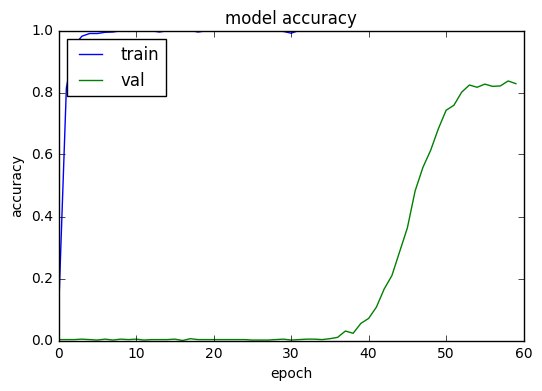

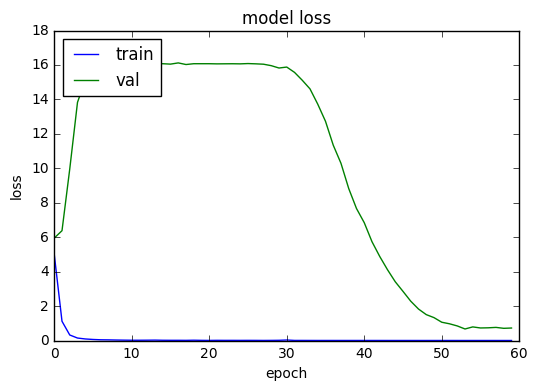

In [12]:
# summarize history for accuracy
plt.plot(result['acc'])
plt.plot(result['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result['loss'])
plt.plot(result['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()